In [20]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
df = pd.read_csv('winequality-red.csv', sep=';') # Load the data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
import shap
import matplotlib.pyplot as plt

In [18]:
# The target variable is 'quality'.
Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [19]:
guess = model.predict(X_test)
mean_squared_error(guess, Y_test)

0.37934361566304653

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

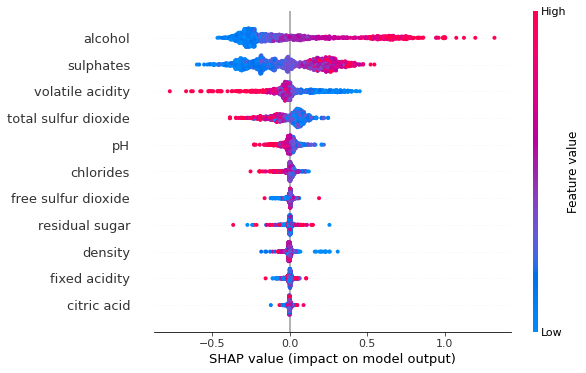

In [33]:
f = plt.figure()
shap.summary_plot(shap_values, X_train)

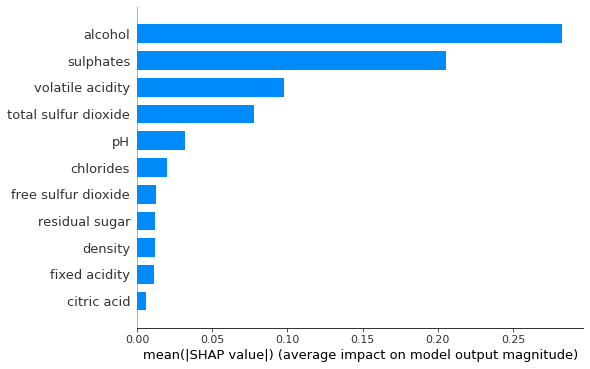

In [32]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

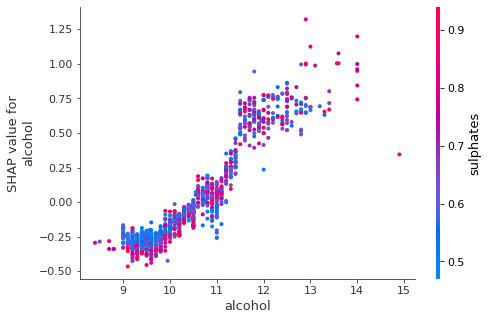

In [42]:
shap.dependence_plot('alcohol', shap_values, X_train)

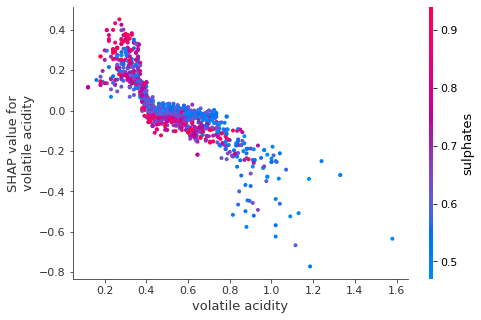

In [43]:
shap.dependence_plot('volatile acidity', shap_values, X_train)

In [38]:
shap.initjs()

In [39]:
shap.force_plot(explainer.expected_value, shap_values[28], X_train.iloc[[28]])

In [40]:
shap.force_plot(explainer.expected_value, shap_values[3], X_train.iloc[[3]])

In [41]:
shap.force_plot(explainer.expected_value, shap_values[195], X_train.iloc[[195]])